23


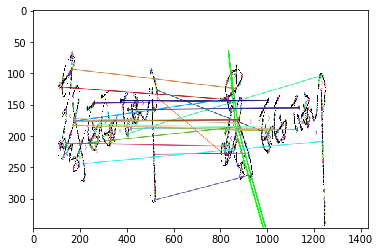

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 4

imgname1 = "0102.tif"
imgname2 = "0101.tif"

## (1) prepare data
img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = img2.copy()
print(len(good))
## (7) find homography matrix
## 当有足够的健壮匹配点对（至少4个）时
if len(good)>MIN_MATCH_COUNT:
    ## 从匹配中提取出对应点对
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    ## 掩模，用作绘制计算单应性矩阵时用到的点对
    #matchesMask2 = mask.ravel().tolist()
    ## 计算图1的畸变，也就是在图2中的对应的位置。
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    ## 绘制边框
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)

## (9) Crop the matched region from scene
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))

## (10) save and display
# cv2.imwrite("matched.png", matched)
# cv2.imwrite("found.png", found)
# cv2.imshow("matched", matched);
# cv2.imshow("found", found);
# cv2.waitKey();cv2.destroyAllWindows()
plt.imshow(matched, aspect='auto',  interpolation='nearest')
plt.show()

45


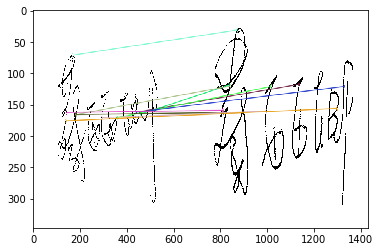

(<matplotlib.image.AxesImage at 0x11ea86e10>, None)

In [18]:
imgname1 = "0102.tif"
imgname2 = "0301.tif"

## (1) prepare data
img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
orb = cv2.ORB_create()
#orb = sift
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(gray1,gray2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3,aspect='auto'),plt.show()


In [39]:
imgname1 = "0301.tif"
imgname2 = "030301.tif"

## (1) prepare data
img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
matches = bf.match(gray1,gray2)
len(matches)

10